In [90]:
import numpy as np
import pandas as pd
import nltk.data
import csv
from tqdm import tqdm
import pickle
import re
import matplotlib.pyplot as plt
import random
random.seed(0)
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [81]:
# LOAD DATA (WILL TAKE FEW SEC)
def read_csv(file_name):
    file_path = './' + file_name + '/' + file_name + '.csv'
    df = pd.read_csv(file_path, usecols = ['text'], encoding='utf-8-sig')
    test_list = list(df.text)
    return test_list

data_list = read_csv('submissions')
data_list = data_list + read_csv('comments')
print('Data size: %d ' % len(data_list))
print(data_list[:5])
print(data_list[-10:])

Data size: 507871 
['Solid buy signal', 'I know this person has to be in this subreddit', 'TOMORROW 🚀🚀🚀 CONFIRMED', '#LONG LIVE THE MEME 🚀🚀🚀', 'THE GOD HAS SPOKEN! 🚀🌌🚀🌌']
['You know when you were little and you broke a lamp and your mom put you in timeout? The govt does a similar thing to people who are irresponsible with money except instead of timeout you get to spend some time in club fed. ', 'rEcEsSiOn', "If you believe the official Chinese GDP numbers you're a bigger moron than he is.", 'How’s club fed compare to club penguin', 'Weak hands bro', 'Why do you need a book when your already an expert?', 'If it goes bankrupt?', 'Which of you fucking retards bought gold for the Auto Moderator for today’s Daily Discussion? Just why?', 'Dead cat bounce: Day 14', "I don't fucking understand how a dovish FED is a bullish signal... it's literally a sign of a weakening economy..."]


In [82]:
print('Example of a long sentences:')
print(data_list[12])

Example of a long sentences:
We know you love Chewy.  We know you're here.  We know you know the Chewy-RyanCohen-GameStop connection, but it wasn't real enough for you yet.  Well, I don't have to tell you, because you're not stupid, but I will anyway:  it's gotten really real enough for you now.  The Chewy executive triumvirate joining the GameStop board of directors is your signal, friend.  You may start pumping GME to your boomer audience.  Now.  I don't believe reddit has been too kind to you in the past, but worry not, follow through with this and you'll have lots of friends here and we'll have your back forever.  Well, definitely not forever, but at least for a while.  What better time to start than today?  With love, brother.

P.S. - don't be afraid to use the rocket 🚀, it feels good.


In [83]:
# WARNING! THIS CELL TAKE A LONG TIME TO RUN
# The data we have is a list of sentences. Sometime it have only 1 sentence, sometime it have more than one sentences.
# Idealy, I used sentence tokenizer to split it into 1 sentence
# The problem is, sentence tokenizer only take a string, so we can only do it for each item in our list:
# It will take sometime to run (AT LEAST 15 MINS)
sentences = []

for item in tqdm(data_list):
    temp = sent_detector.tokenize(item)
    sentences = sentences + temp

print('Data size: %d ' % len(sentences))

100%|████████████████████████████████████████████████████████████████████████| 507871/507871 [1:25:59<00:00, 98.44it/s]

Data size: 967968 


In [8]:
print(sentences[22:35])

['We know you love Chewy.', "We know you're here.", "We know you know the Chewy-RyanCohen-GameStop connection, but it wasn't real enough for you yet.", "Well, I don't have to tell you, because you're not stupid, but I will anyway:  it's gotten really real enough for you now.", 'The Chewy executive triumvirate joining the GameStop board of directors is your signal, friend.', 'You may start pumping GME to your boomer audience.', 'Now.', "I don't believe reddit has been too kind to you in the past, but worry not, follow through with this and you'll have lots of friends here and we'll have your back forever.", 'Well, definitely not forever, but at least for a while.', 'What better time to start than today?', 'With love, brother.', 'P.S.', "- don't be afraid to use the rocket 🚀, it feels good."]


In [10]:
# Save result:
#with open("data.txt", "wb") as fp:   #Pickling
#    pickle.dump(sentences, fp)

## 1 Preprocessing data

In [77]:
clean_sentences = []
words_count = []
sentence_length = []
for text in sentences:    
    
    # The sentences have a few \n inside them. We need to clear '\n' with another step:
    text = text.replace('\n', ' ') # we MUST replace them with a white space 
    
    # Replace 1 or more white space (\s+) with only one white space
    text = re.sub(r'\s+', ' ', text)
    
    # Lower case
    text = text.lower()
    
    text = re.sub(r'\*\*.*week\)', '', text) #remove tagging (** xxxx week))    
    text = re.sub(r'\[(.*?)\]\(.*?\)', '', text) #remove reddit link
    text = re.sub(r'\S*https?:\S*' ,'', text) #remove reddit preview link
    text = re.sub(r'\^navigate \^wsb|.*keep wsb great.', '', text) #remove recommend thread
    text = re.sub(r'your daily trading discussion thread.', '', text) #remove discussion thread
    text = re.sub(r'what are your moves tomorrow\S*', '', text) #remove discussion thread
    
    
    # Replace 1 or more white space (\s+) with only one white space
    # Do this also after finish cleaning
    text = re.sub(r'\s+', ' ', text)
    
    #Count word (count number of space)
    word_count = len(re.findall(r' ', text))+1
    words_count.append(word_count)
    
    #sentence length
    sentence_length.append(len(text))
    
    # We choose the cut-off at 15 due to the sentence_length histogram result
    if len(text)>=15:
        clean_sentences.append(text)

In [79]:
print(clean_sentences[:30])
print(len(clean_sentences))

['solid buy signal', 'i know this person has to be in this subreddit', 'tomorrow 🚀🚀🚀 confirmed', '#long live the meme 🚀🚀🚀', 'the god has spoken!', 'exclusive interview with wsb redditor', 'you people are creating autists.', 'gme yolo update — jan 11 2021', 'ok jim cramer, you may now start pumping gme', 'join the movement 🚀 - latest update on cnbc', "hi i'm okay, just looking for some sweet karma", 'to preface this story, i am a licensed, fee-only advisor in the usa.', 'i manage roughly $26mm.', 'i was speaking to a client this morning and he asked if i would have a conversation with his 15 year old son and answer some questions for him and point him in the right direction in terms of his finances.', "he has apparently got a little lucky on $tsla lately and made some good money for a 15 year old, (i'm assuming he is using his parents' outside account).", 'as soon as i got on the phone with him, i noticed an air of superiority.', 'after discussing his "investment strategy" with him for 

In [80]:
# Save result:
#with open("clean_data.txt", "wb") as fp:   #Pickling
#    pickle.dump(clean_sentences, fp)

In [88]:
# Load result:
with open("clean_data.txt", "rb") as fp:   # Unpickling
    clean_sentences = pickle.load(fp)

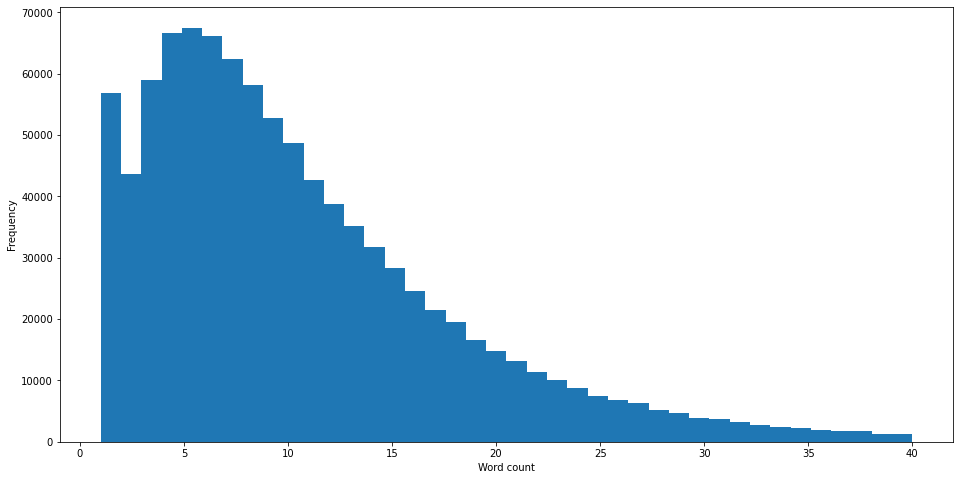

In [57]:
plt.figure(figsize=(16,8))
plt.hist(words_count, bins = 40, range=(1,40))
plt.xlabel("Word count")
plt.ylabel("Frequency")
#plt.savefig("word_count.png")
plt.show()

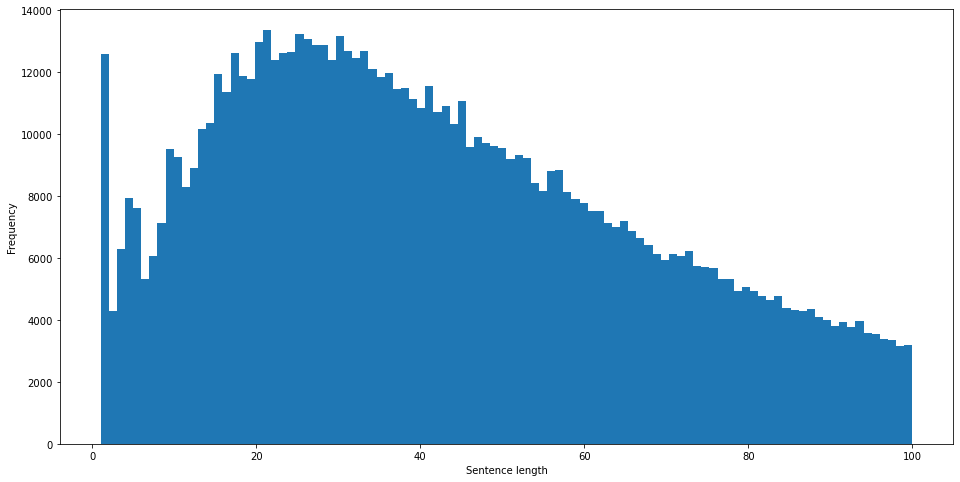

In [72]:
plt.figure(figsize=(16,8))
plt.hist(sentence_length, bins = 100, range=(1,100))
plt.xlabel("Sentence length")
plt.ylabel("Frequency")
#plt.savefig("Sentence_length.png")
plt.show()

In [91]:
sample = random.choices(clean_sentences, k=20000)
sample_2x = random.choices(clean_sentences, k=40000)
sample_4x = random.choices(clean_sentences, k=80000)
sample_8x = random.choices(clean_sentences, k=160000)

In [83]:
print(sample[:30])
print(len(sample))

['you think dr. pp doesn’t fuck?', 'definitely not as good as this fake market pump would like you to believe.', 'uso to the moon', 'japan should have been the warning, not the roadmap.', "the higher or lower the amount you set, the riskier the play, but it's usually cheaper than buying safer choices.", 'you just made me buy 100k of tsla at $4000.', 'high skill maneuvering made me go from -40% to -20%😎😎', 's&amp;p 500 is down -19.06% from its all time intraday high of 3393.52, reached 2/19.', 'man i’m 21 and i just want to make enough in the stock market so that i can give back to my parents and help them finally retire', 'girl from tinder came over to have some sexy time while the wife was away.', 'a fast casual restaurant (like a poke place) is doing ducking amazingly if it is doing $1 million a year in revenue.', 'who decided to have children between 1980-1995?', ' **“we are not a pump and dump scheme”** sounds like something a pump and dump would say.', 'then he got perma banned af

In [95]:
# Save result:
#with open("data_sample.txt", "wb") as fp:   #Pickling
#    pickle.dump(sample, fp)

In [96]:
# Load result:
with open("data_sample.txt", "rb") as fp:   # Unpickling
    sample = pickle.load(fp)
print(sample[:30])
print(len(sample))

['that sub is where people go to humble brag about their zero debt, 100k salary, paid off home, etc....', "we're as ready as we can be.", 'imagine having more than 10% bodyfat in 2020', 'first act should be to work to reinstate the fairness doctrine.', 'this recovery is absurdly bullish.', 'swear to god girls text back now and its the dumbest shit ever...', 'black monday joined the chat', 'teach him a lesson for looking down on us.', 'it had one but op was hungry', 'because the nkla ceo is basically a scam artist and picked this name to trick people into thinking his company is anything like tsla.', "what's scary to me, though, is that it isn't just one or two things that everyone is waiting for.", 'now the actual data and antibody response was published in one of the best medical journals.', 'once you understand how the price moves, halve it to 6 months, then to 3 months, then to 1 month, and eventually you will find yourself buying deep otm spy options that expire 2 hours from purcha